In [1]:
def getAgentRegistration(agent, accessGrantId):
    import datetime
    return '''@prefix interop: <http://www.w3.org/ns/solid/interop#>.
    @prefix xsd: <http://www.w3.org/2001/XMLSchema#>.
    @prefix pod-agents: <{{{{podBaseUrl}}}}registries/agents/>.
    @prefix pod-grants: <{{{{podBaseUrl}}}}registries/authorizations/>.
    <>
    a interop:SocialAgentRegistration ;
    interop:registeredBy <{{{{webId}}}}> ;
    interop:registeredWith <{{{{authorizationAgent}}}}> ;
    interop:registeredAt "{dateTime}"^^xsd:dateTime ;
    interop:updatedAt "{dateTime}"^^xsd:dateTime ;
    interop:registeredAgent <{agent}> ;
    interop:hasAccessGrant pod-grants:{accessGrantId} .'''.format(agent=agent,accessGrantId=accessGrantId,dateTime=datetime.datetime.now().isoformat())

In [2]:
def getApplicationRegistration(application, accessGrantId):
    import datetime
    return '''@prefix interop: <http://www.w3.org/ns/solid/interop#>.
    @prefix xsd: <http://www.w3.org/2001/XMLSchema#>.
    @prefix pod-agents: <{{{{podBaseUrl}}}}registries/agents/>.
    @prefix pod-grants: <{{{{podBaseUrl}}}}registries/authorizations/>.
    <>
    a interop:ApplicationRegistration ;
    interop:registeredBy <{{{{webId}}}}> ;
    interop:registeredWith <{{{{authorizationAgent}}}}> ;
    interop:registeredAt "{dateTime}"^^xsd:dateTime ;
    interop:updatedAt "{dateTime}"^^xsd:dateTime ;
    interop:registeredAgent <{app}> ;
    interop:hasAccessGrant pod-grants:{accessGrantId} .'''.format(app=application,accessGrantId=accessGrantId,dateTime=datetime.datetime.now().isoformat())

In [3]:
def getAccessGrant(agent, dataGrantIds):
    return '''@prefix interop: <http://www.w3.org/ns/solid/interop#>.
@prefix xsd: <http://www.w3.org/2001/XMLSchema#>.
@prefix pod-grants: <{{{{podBaseUrl}}}}registries/authorizations/>.
<>
  a interop:AccessGrant ;
  interop:grantedBy <{{{{webId}}}}> ;
  interop:grantedAt "2020-04-04T20:15:47.000Z"^^xsd:dateTime ;
  interop:grantee <{agent}> ;
  interop:hasAccessNeedGroup <{agent}/needs> ;
  interop:hasDataGrant
    {dataGrants} .'''.format(agent=agent,dataGrants=','.join([f'pod-grants:{x}' for x in dataGrantIds]))

In [4]:
def getAllFromRegistryDataGrant(agent, registrationId, shapeTree="solidtrees:Task.ttl"): 
    return '''@prefix interop: <http://www.w3.org/ns/solid/interop#>.
@prefix pod-grants: <{{{{podBaseUrl}}}}registries/authorizations/>.
@prefix pod-data: <{{{{podBaseUrl}}}}data/>.
@prefix solidtrees: <https://thundr.be/experiments/interop/trees/>.
@prefix acl: <http://www.w3.org/ns/auth/acl#>.

<>
  a interop:DataGrant ;
  interop:dataOwner <{{{{webId}}}}> ;
  interop:grantee <https://example.org/id> ;
  interop:registeredShapeTree {shapeTree} ;
  interop:hasDataRegistration  pod-data:{registrationId}\/;
  interop:satisfiesAccessNeed <{agent}/needs#1> ;
  interop:accessMode acl:Read, acl:Create, acl:Append, acl:Delete ;
  interop:scopeOfGrant interop:AllFromRegistry .
    '''.format(agent=agent, registrationId=registrationId, shapeTree=shapeTree)

In [5]:
def getDataRegistry(registrationIds):
    return '''@prefix interop: <http://www.w3.org/ns/solid/interop#>.
@prefix pod-data: <{{{{podBaseUrl}}}}data/>.
@prefix pod: <{{{{podBaseUrl}}}}>.

pod:registries\/data\/index
  interop:hasDataRegistration {registrations};
  a interop:DataRegistry .
    '''.format(registrations=','.join([f'pod-data:{x}\/' for x in registrationIds]))

In [6]:
def getAuthorizationRegistry():
    return '''@prefix interop: <http://www.w3.org/ns/solid/interop#>.
@prefix pod: <{{podBaseUrl}}>.

pod:registries\/authorizations\/index
  a interop:AuthorizationRegistry .'''

In [7]:
def getAgentRegistry(agentRegistrationIds, applicationRegistrationIds):
    return '''@prefix interop: <http://www.w3.org/ns/solid/interop#>.
@prefix pod-agents: <{{{{podBaseUrl}}}}registries/agents/>.

pod-agents:index
  interop:hasSocialAgentRegistration {agentRegistrations};
  interop:hasApplicationRegistration {appRegistrations};
  a interop:AgentRegistry .'''.format(agentRegistrations=','.join([f'pod-agents:{x}' for x in agentRegistrationIds]),
  appRegistrations=','.join([f'pod-agents:{x}' for x in applicationRegistrationIds]))

In [8]:
def getRegistrySet():
    return '''@prefix interop: <http://www.w3.org/ns/solid/interop#>.
@prefix pod: <{{podBaseUrl}}>.

<>
  a interop:RegistrySet ;
  interop:hasAgentRegistry pod:registries\/agents\/index ;
  interop:hasAuthorizationRegistry pod:registries\/authorizations\/index ;
  interop:hasDataRegistry pod:registries\/data\/index .'''

In [9]:
def getTaskRegistrationMeta():
    return '''PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX interop: <http://www.w3.org/ns/solid/interop#>
PREFIX solidtrees: <https://thundr.be/experiments/interop/trees/>

<>
  a interop:DataRegistration ;
  interop:registeredBy <{{webId}}> ;
  interop:registeredWith <{{authorizationAgent}}> ;
  interop:registeredAt "2022-05-18T11:42:36.000Z"^^xsd:dateTime ;
  interop:registeredShapeTree solidtrees:Task.ttl .'''

In [10]:
def getTask():
  msg = "Clean my room."
  return '''PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX pm: <https://vocab.example/project-management/>

<#task>
  a pm:Task ;
  rdfs:label "{msg}" .'''.format(msg=msg)

In [11]:
getAgentRegistration('http://example.com', '123')

'@prefix interop: <http://www.w3.org/ns/solid/interop#>.\n    @prefix xsd: <http://www.w3.org/2001/XMLSchema#>.\n    @prefix pod-agents: <{{podBaseUrl}}registries/agents/>.\n    @prefix pod-grants: <{{podBaseUrl}}registries/authorizations/>.\n    <>\n    a interop:SocialAgentRegistration ;\n    interop:registeredBy <{{webId}}> ;\n    interop:registeredWith <{{authorizationAgent}}> ;\n    interop:registeredAt "2022-05-26T09:57:28.265942"^^xsd:dateTime ;\n    interop:updatedAt "2022-05-26T09:57:28.265942"^^xsd:dateTime ;\n    interop:registeredAgent <http://example.com> ;\n    interop:hasAccessGrant pod-grants:123 .'

In [12]:
getAccessGrant('http://example.com', ['123', '456'])

'@prefix interop: <http://www.w3.org/ns/solid/interop#>.\n@prefix xsd: <http://www.w3.org/2001/XMLSchema#>.\n@prefix pod-grants: <{{podBaseUrl}}registries/authorizations/>.\n<>\n  a interop:AccessGrant ;\n  interop:grantedBy <{{webId}}> ;\n  interop:grantedAt "2020-04-04T20:15:47.000Z"^^xsd:dateTime ;\n  interop:grantee <http://example.com> ;\n  interop:hasAccessNeedGroup <http://example.com/needs> ;\n  interop:hasDataGrant\n    pod-grants:123,pod-grants:456 .'

In [13]:
getAllFromRegistryDataGrant('http://example.com', '123')

'@prefix interop: <http://www.w3.org/ns/solid/interop#>.\n@prefix pod-grants: <{{podBaseUrl}}registries/authorizations/>.\n@prefix pod-data: <{{podBaseUrl}}data/>.\n@prefix solidtrees: <https://thundr.be/experiments/interop/trees/>.\n@prefix acl: <http://www.w3.org/ns/auth/acl#>.\n\n<>\n  a interop:DataGrant ;\n  interop:dataOwner <{{webId}}> ;\n  interop:grantee <https://example.org/id> ;\n  interop:registeredShapeTree solidtrees:Task.ttl ;\n  interop:hasDataRegistration  pod-data:123\\/;\n  interop:satisfiesAccessNeed <http://example.com/needs#1> ;\n  interop:accessMode acl:Read, acl:Create, acl:Append, acl:Delete ;\n  interop:scopeOfGrant interop:AllFromRegistry .\n    '

In [14]:
getDataRegistry(['123', '456'])

'@prefix interop: <http://www.w3.org/ns/solid/interop#>.\n@prefix pod-data: <{{podBaseUrl}}data/>.\n@prefix pod: <{{podBaseUrl}}>.\n\npod:registries\\/data\\/index\n  interop:hasDataRegistration pod-data:123\\/,pod-data:456\\/;\n  a interop:DataRegistry .\n    '

In [15]:
getAuthorizationRegistry()

'@prefix interop: <http://www.w3.org/ns/solid/interop#>.\n@prefix pod: <{{podBaseUrl}}>.\n\npod:registries\\/authorizations\\/index\n  a interop:AuthorizationRegistry .'

In [16]:
getAgentRegistry(['123'], ['456'])

'@prefix interop: <http://www.w3.org/ns/solid/interop#>.\n@prefix pod-agents: <{{podBaseUrl}}registries/agents/>.\n\npod-agents:index\n  interop:hasSocialAgentRegistration pod-agents:123;\n  interop:hasApplicationRegistration pod-agents:456;\n  a interop:AgentRegistry .'

In [17]:
getTask()

'PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>\nPREFIX pm: <https://vocab.example/project-management/>\n\n<#task>\n  a pm:Task ;\n  rdfs:label "Clean my room." .'

In [18]:
def generateDataRegistrations(path, amount, instances):
    import uuid
    import os
    res = [uuid.uuid4() for _ in range(amount)]  # List of registration IDs
    # Generate (amount) new directories
    # In each directory, store a .meta.hbs
    # In each directory, store instances new tasks
    for uid in res:
        filename = f'{path}/{uid}/.meta.hbs'
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        with open(filename, "w") as f:
            f.write(getTaskRegistrationMeta())
        for _ in range(instances):
            with open(f'{path}/{uid}/{uuid.uuid4()}$.ttl.hbs', "w") as f:
                f.write(getTask())
    return res

In [19]:
def generateRegistrySet(path, agents, registrations, instances):
    import uuid
    import os
    res = generateDataRegistrations(f'{path}/data', registrations, instances)  # List of data registration IDs

    # Write registry set
    filename = f'{path}/registries/index$.ttl.hbs'
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    with open(filename, "w") as f:
        f.write(getRegistrySet())
    
    # Write Data Registration
    filename = f'{path}/registries/data/index$.ttl.hbs'
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    with open(filename, "w") as f:
        f.write(getDataRegistry(res))

    # Write Data Registration
    filename = f'{path}/registries/authorizations/index$.ttl.hbs'
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    with open(filename, "w") as f:
        f.write(getAuthorizationRegistry())

    # Generate agent authorizations
    agentRegistrationIds = []

    for i in range(agents):
        webid = f'https://example.org/{i}'

        # Generate Data Grants
        grants = []
        for uid in res:
            grant = uuid.uuid4()
            filename = f'{path}/registries/authorizations/{grant}$.ttl.hbs'
            os.makedirs(os.path.dirname(filename), exist_ok=True)
            with open(filename, "w") as f:
                f.write(getAllFromRegistryDataGrant(webid, uid))
            grants.append(grant)
            

        # Generate Access Grant
        grant = uuid.uuid4()
        filename = f'{path}/registries/authorizations/{grant}$.ttl.hbs'
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        with open(filename, "w") as f:
            f.write(getAccessGrant(webid, grants))

        # Generate Agent Registration
        registrationId = uuid.uuid4()
        agentRegistrationIds.append(registrationId)
        filename = f'{path}/registries/agents/{registrationId}$.ttl.hbs'
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        with open(filename, "w") as f:
            f.write(getAgentRegistration(webid, grant))
    
    # Generate application authorizations
    appRegistrationIds = []
    for i in range(agents):
        webid = f'https://example.org/app/{i}'

        # Generate Data Grants
        grants = []
        for uid in res:
            grant = uuid.uuid4()
            filename = f'{path}/registries/authorizations/{grant}$.ttl.hbs'
            os.makedirs(os.path.dirname(filename), exist_ok=True)
            with open(filename, "w") as f:
                f.write(getAllFromRegistryDataGrant(webid, uid))
            grants.append(grant)
            

        # Generate Access Grant
        grant = uuid.uuid4()
        filename = f'{path}/registries/authorizations/{grant}$.ttl.hbs'
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        with open(filename, "w") as f:
            f.write(getAccessGrant(webid, grants))

        # Generate Agent Registration
        registrationId = uuid.uuid4()
        appRegistrationIds.append(registrationId)
        filename = f'{path}/registries/agents/{registrationId}$.ttl.hbs'
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        with open(filename, "w") as f:
            f.write(getApplicationRegistration(webid, grant))

    filename = f'{path}/registries/agents/index$.ttl.hbs'
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    with open(filename, "w") as f:
        f.write(getAgentRegistry(agentRegistrationIds, appRegistrationIds))
    return res

In [21]:
generateRegistrySet('pod-50_100', 50, 100, 5)

[UUID('7caed37e-9739-4cb5-93e0-7e107bedc812'),
 UUID('12dd17e7-d1e8-4a54-8c01-e59b47888e69'),
 UUID('a00347cc-bce8-4ce4-89ac-b2bf5999cd1d'),
 UUID('e1f8f2df-22b0-4288-baf2-32bd37e93afc'),
 UUID('8825de6e-93c7-418e-a88c-acf56a0b3a98'),
 UUID('c1f6c9f6-69aa-4a80-a928-3914902b7276'),
 UUID('d38d330b-5d71-4c1d-adaa-b8f7429a9fe9'),
 UUID('f5349017-869e-4e51-83a2-36dab769fef8'),
 UUID('b50a6fe9-3f7e-4907-94cf-d1bc0b4a90b4'),
 UUID('7423716b-a7c1-4f2b-9581-19ef506b77e1'),
 UUID('94892ce9-548d-4c32-9a16-c5a6752dcbd5'),
 UUID('b0966078-df81-4ad5-9dd2-0a63ecbbbce0'),
 UUID('592f9e90-db30-4062-bb49-6de82f9204e2'),
 UUID('e8d922ad-c848-4eaf-8608-3293decfb75d'),
 UUID('8863f323-90a9-4de3-98a6-f74c5f31265a'),
 UUID('82ee2012-a91b-4fe2-84d9-6e1ada2d75c2'),
 UUID('f7b5f645-5e28-4989-9d0b-b60dd5dc53bf'),
 UUID('344f2622-f595-4477-a00d-2e515f389a88'),
 UUID('b1ac66a2-28a5-41d0-bba6-6a76340df7af'),
 UUID('1bfc7ee5-6301-4e23-851e-fb2eebd0481c'),
 UUID('6b2e8983-183c-4577-b930-788cd588123f'),
 UUID('f644a2

In [23]:
import requests

url = "http://localhost:4001/aa/client/aHR0cDovL2xvY2FsaG9zdDozMDAwL2FsaWNlL3Byb2ZpbGUvY2FyZCNtZQ=="

payload={}
headers = {
  'Authorization': 'Bearer https%3A%2F%2Fexample.org%2F24:https%3A%2F%2Fexample.org%2Fapp%2F4'
}

response = requests.request("HEAD", url, headers=headers, data=payload)

print(response.headers)

{'content-type': 'text/plain', 'link': '<https://example.org/24>; anchor="http://localhost:3000/alice/registries/agents/fe409196-4f8d-436a-8ea0-d2ffd7503181"; rel="http://www.w3.org/ns/solid/interop#registeredAgent"', 'Date': 'Thu, 26 May 2022 08:04:31 GMT', 'Connection': 'keep-alive', 'Keep-Alive': 'timeout=5'}


In [110]:
import pandas as pd 
df = pd.DataFrame({"configuration": [], "time": [], "type": []})

In [99]:
# 10_10
dummy_authn = 'https%3A%2F%2Fexample.org%2F9:https%3A%2F%2Fexample.org%2Fapp%2F4'
config = '(10, 10)'
registration = 'http://localhost:3000/alice/registries/agents/0c1570f7-f8ff-40f6-9410-b402071008ce'
access_grant = 'http://localhost:3000/alice/registries/authorizations/a506f5a5-a042-4ca6-ad64-69d623c791cb'
data_grant = 'http://localhost:3000/alice/registries/authorizations/17981d3e-1743-43ff-8c50-fad34ba04dec'
data_registration = 'http://localhost:3000/alice/data/7dbb3717-2093-4504-b395-a1697b7d91ca/'
data_instance = 'http://localhost:3000/alice/data/7dbb3717-2093-4504-b395-a1697b7d91ca/919250fd-0f99-4d77-90ce-87d3ba18a997'

In [116]:
# 10_100
dummy_authn = 'https%3A%2F%2Fexample.org%2F9:https%3A%2F%2Fexample.org%2Fapp%2F4'
config = '(10, 100)'
registration = 'http://localhost:3000/alice/registries/agents/ba70c64f-0edb-4a45-b851-d473e07e1c57'
access_grant = 'http://localhost:3000/alice/registries/authorizations/bfda7063-0660-4d54-b547-339e4b22ae86'
data_grant = 'http://localhost:3000/alice/registries/authorizations/98ef203c-0237-4083-9c59-aa3a22a6e4ca'
data_registration = 'http://localhost:3000/alice/data/946b187f-173f-4139-a06b-44be1103405c/'
data_instance = 'http://localhost:3000/alice/data/946b187f-173f-4139-a06b-44be1103405c/fa639ae7-e027-41fe-a676-781be07f81b4'

In [125]:
# 50_10
dummy_authn = 'https%3A%2F%2Fexample.org%2F24:https%3A%2F%2Fexample.org%2Fapp%2F4'
config = '(50, 10)'

registration = 'http://localhost:3000/alice/registries/agents/fe409196-4f8d-436a-8ea0-d2ffd7503181'
access_grant = 'http://localhost:3000/alice/registries/authorizations/f2ed5a00-624e-4dff-8766-5b85a448b4bd'
data_grant = 'http://localhost:3000/alice/registries/authorizations/8007dfd2-ba5c-4a93-b166-40ee6706b2e1'
data_registration = 'http://localhost:3000/alice/data/32675898-00dd-45f6-af3d-9ee7dc6da820/'
data_instance = 'http://localhost:3000/alice/data/32675898-00dd-45f6-af3d-9ee7dc6da820/ed1321bf-2aa5-4f42-a986-bc090fff0238'

In [131]:
# 50_100
dummy_authn = 'https%3A%2F%2Fexample.org%2F24:https%3A%2F%2Fexample.org%2Fapp%2F4'
config = '(50, 100)'

registration = 'http://localhost:3000/alice/registries/agents/4c92f89b-f418-414c-9748-e932ec492d1d'
access_grant = 'http://localhost:3000/alice/registries/authorizations/d18d14f0-6e4c-465d-a4a7-bf99bdbc3936'
data_grant = 'http://localhost:3000/alice/registries/authorizations/9a1ed460-2aad-431f-a0af-9d11faa873dc'
data_registration = 'http://localhost:3000/alice/data/bea7c6ec-979a-426e-8bda-9e240d9da0b3/'
data_instance = 'http://localhost:3000/alice/data/bea7c6ec-979a-426e-8bda-9e240d9da0b3/c4ad5428-a96b-45b3-924c-331fb4858ec4'

In [134]:
# Retrieve resource
# Use ticket to call UMA AS
# Add elapsed time to 
def time_uma_as(url):
    # Call get on resource
    # Parse ticket from header
    # Call token endpoint
    # Return elapsed time
    import requests
    import urllib

    response = requests.request("GET", url, headers={}, data={})

    ticket = response.headers['WWW-Authenticate'].split(',')[2][8:-1]


    as_token_url = "http://localhost:4000/uma/token"
    f = { 'grant_type' : 'urn:ietf:params:oauth:grant-type:uma-ticket', 'ticket' : ticket, 'claim_token': dummy_authn, 'claim_token_format': 'urn:authorization-agent:dummy-token'}

    payload=urllib.parse.urlencode(f)
    headers = {
    'Content-Type': 'application/x-www-form-urlencoded'
    }

    response = requests.request("POST", as_token_url, headers=headers, data=payload)

    return response.elapsed
time_uma_as(registration)

datetime.timedelta(seconds=20, microseconds=184756)

In [135]:
def time_all():
    import tqdm
    its = 250
    data = {
    "time": [],
    "type": [],
    }
    for (label, uri) in [('Agent Registration', registration),('Access Grant',access_grant),('Data Grant', data_grant),('Data Registration', data_registration),('Data Instance', data_instance)]:
        for _ in tqdm.tqdm(range(its)):
            data["time"].append(time_uma_as(uri).total_seconds() * 1000)
            data["type"].append(label)
    return data

res = time_all()


100%|██████████| 250/250 [04:28<00:00,  1.07s/it]


In [136]:

#load data into a DataFrame object:
df_temp = pd.DataFrame(res)
df_temp['configuration'] = config
df_temp

,time,type,configuration
0,393.750,Agent Registration,"(50, 100)"
1,459.612,Agent Registration,"(50, 100)"
2,666.298,Agent Registration,"(50, 100)"
3,671.473,Agent Registration,"(50, 100)"
4,613.367,Agent Registration,"(50, 100)"
...,...,...,...
1245,1065.379,Data Instance,"(50, 100)"
1246,1029.849,Data Instance,"(50, 100)"
1247,994.137,Data Instance,"(50, 100)"
1248,1038.911,Data Instance,"(50, 100)"


In [137]:
df = pd.concat([df, df_temp])
df

,configuration,time,type
0,"(10, 10)",1590.800,Agent Registration
1,"(10, 10)",172.783,Agent Registration
2,"(10, 10)",185.972,Agent Registration
3,"(10, 10)",183.497,Agent Registration
4,"(10, 10)",166.466,Agent Registration
...,...,...,...
1245,"(50, 100)",1065.379,Data Instance
1246,"(50, 100)",1029.849,Data Instance
1247,"(50, 100)",994.137,Data Instance
1248,"(50, 100)",1038.911,Data Instance


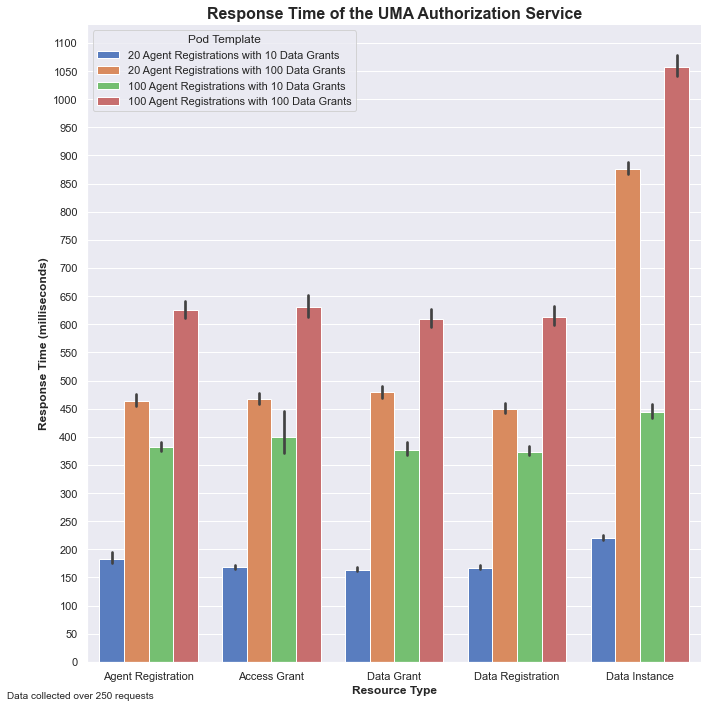

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Calibri']
sns.set_theme()
g = sns.catplot(x="type", y="time", hue="configuration",
                   data=df, kind="bar",
                   height=10, palette="muted", legend=False)

plt.title('Response Time of the UMA Authorization Service', fontweight='bold', fontsize=16)
legend = plt.legend()
legend.set_title("Pod Template")
mapping = {"(10, 10)": "20 Agent Registrations with 10 Data Grants",
"(10, 100)": "20 Agent Registrations with 100 Data Grants",
"(50, 10)": "100 Agent Registrations with 10 Data Grants",
"(50, 100)": "100 Agent Registrations with 100 Data Grants",
}
for t in legend.texts:
    t.set_text(mapping[t.get_text()])

g.set_ylabels("Response Time (milliseconds)", fontweight='bold')
g.set_xlabels("Resource Type", fontweight='bold')

start, end = g.ax.get_ylim()
g.ax.yaxis.set_ticks(np.arange(start, end, 50))

plt.annotate('Data collected over 250 requests', (0,0), (-80,-30), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top')
plt.tight_layout()
plt.savefig("plots.pdf")

In [200]:
fig = g.figure
fig.savefig("plots.pdf")

In [139]:
df.to_csv('results.csv')